# interactive visualization of neurotranscriptome data

### import python modules, initialize bokeh plots inline


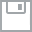
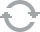
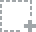
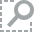
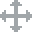
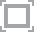
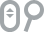
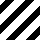
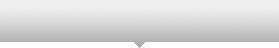
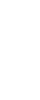
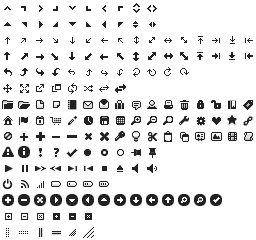
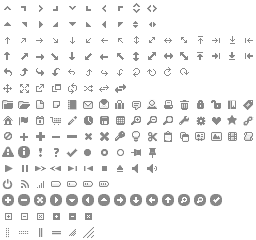
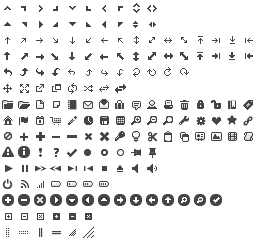
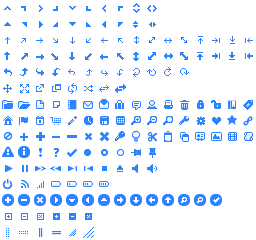
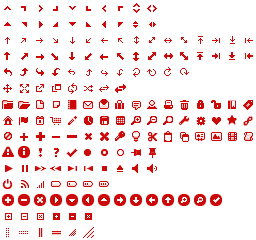
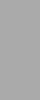
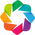
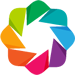

In [41]:
from bokeh.io import output_notebook, output_server
from bokeh.plotting import figure,show
import pandas as pd
import numpy as np


ANNOTATION = 'files/Additional file 3 - AaegLRU annotation.xlsx'
TPM_RU = 'files/Additional File 5 - TPM_all.xlsx'
TPM_VEC = 'files/Additional File 6 - TPM_all_AaegL3.3.xlsx'

output_notebook()

### import TPM values and annotations

In [7]:
annotations = pd.read_excel(ANNOTATION)
tpm_ru = pd.read_excel(TPM_RU)
tpm_vec = pd.read_excel(TPM_VEC)

### very basic plot - everything hardcoded and output in notebook

In [38]:
tpm_plot = figure()

x = tpm_ru['Fe_An_BF_1']
y = tpm_ru['Fe_An_BF_2']

tpm_plot.scatter(x=np.log10(1+x),y=np.log10(1+y),fill_alpha=0.2)
show(tpm_plot)

### first attempt at interaction - slider to set the alpha level

In [59]:
from bokeh.io import vform
from bokeh.models import CustomJS, ColumnDataSource, Slider
from bokeh.plotting import figure, output_file, show, hplot

output_server("tpm_plot_server")

x = tpm_ru['Fe_An_BF_1']
y = tpm_ru['Fe_An_BF_2']

alpha = 0.5

source = ColumnDataSource(data=dict(x=np.log10(1+x), y=np.log10(1+y)))

tpm_plot_slider = figure()
tpm_plot_slider.scatter(x='x',y='y',source=source,alpha=alpha)

callback = CustomJS(args=dict(source=source), code="""
    var data = source.get('data');
    var alpha = alpha.get('value')
    x = data['x']
    y = data['y']
    
    source.trigger('change');
""")

alpha_slider = Slider(start=0, end=1, value=.5, step=.01, title="Alpha value for visualization",callback=callback)
callback.args["alpha"] = alpha_slider

layout = hplot(
    tpm_plot_slider,
    vform(alpha_slider),
)

show(layout)


Using saved session configuration for http://localhost:5006/
To override, pass 'load_from_config=False' to Session
